**Владислав Скибчик (поток 2). Итоговая аттестация по курсу «Программная инженерия: IT-лидеры будущего»**

**ТЕМА: «АНАЛИЗ КЛАССИЧЕСКОЙ ЛИТЕРАТУРЫ»**

---



### 3. Анализ классической литературы (https://github.com/nevmenandr/word2vec-russian-novels/tree/master/books_before)



В этом проекте предстоит провести анализ текстов классической литературы. Цель проекта — исследовать лексический состав, частоту употребления слов, тематические модели и другие аспекты текста, которые помогут лучше понять стиль и содержание произведений.


**Задачи проекта:**

**Задание 1. Сбор данных:**

Найдите и загрузите несколько произведений классической литературы (например, романы Льва Толстого, Федора Достоевского или других авторов).


Перейдем в репозиторий GitHub по ссылке, чтобы скачать произведения. Загрузим их традиционно на Google Drive:

In [9]:
# классика
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



**Задание 2. Предобработка текста: Очистите текст от пунктуации, приведите слова к нижнему регистру, выполните лемматизацию и/или стемминг. Разделите текст на предложения и слова, удалите стоп-слова.**

Приступим к работе!

Импортируем библиотеку NLTK, которую мы разбирали во время изучения 3-го модуля. NLTK (Natural Language Toolkit) – ведущая платформа для создания NLP-программ на Python. У нее есть легкие в использовании интерфейсы для многих языковых корпусов, а также библиотеки для обработки текстов для классификации, токенизации, стемминга, разметки, фильтрации и семантических рассуждений.

In [3]:
!pip install nltk

# nltk — библиотека для обработки естественного языка, предоставляющая инструменты для работы с текстами и анализа языка.

In [7]:
# Импорт библиотеки nltk
import nltk

# Загрузка набора данных 'punkt' для токенизации текста
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

punkt — это набор данных, используемый библиотекой NLTK (Natural Language Toolkit) для токенизации текста на отдельные предложения и слова. Это предобученный список правил и моделей, которые помогают разбивать текст на токены. Когда загружается punkt, пользователь получает доступ к алгоритмам, которые способны понимать границы предложений и слов в разных языках, в т.ч. и в русском.

**Токенизация** (иногда – сегментация) по предложениям – это процесс разделения письменного языка на предложения-компоненты. Идея выглядит довольно простой. В английском и некоторых других языках мы можем вычленять предложение каждый раз, когда находим определенный знак пунктуации – точку.

И поскольку мне с самого детства нравится творчество великого русского поэта Пушкина, я решил провести обработку текста культового произведения "Евгений Онегин".

In [5]:
# Исходный текст для токенизации предложений
with open('/content/drive/MyDrive/EugeneOnegin.txt', 'r') as file:
    text = file.read()
    print(text)

ЕВГЕНИЙ ОНЕГИН
РОМАН В СТИХАХ

Не мысля гордый свет забавить,
Вниманье дружбы возлюбя,
Хотел бы я тебе представить
Залог достойнее тебя,
Достойнее души прекрасной,
Святой исполненной мечты,
Поэзии живой и ясной,
Высоких дум и простоты;
Но так и быть - рукой пристрастной
Прими собранье пестрых глав,
Полусмешных, полупечальных,
Простонародных, идеальных,
Небрежный плод моих забав,
Бессонниц, легких вдохновений,
Незрелых и увядших лет,
Ума холодных наблюдений
И сердца горестных замет.

ГЛАВА ПЕРВАЯ

И жить торопится и чувствовать спешит.
Кн. Вяземский.

I

'Мой дядя самых честных правил,
Когда не в шутку занемог,
Он уважать себя заставил
И лучше выдумать не мог.
Его пример другим наука;
Но, боже мой, какая скука
С больным сидеть и день и ночь,
Не отходя ни шагу прочь!
Какое низкое коварство
Полуживого забавлять,
Ему подушки поправлять,
Печально подносить лекарство,
Вздыхать и думать про себя:
Когда же черт возьмет тебя!'
II

Так думал молодой повеса,
Летя в пыли на почтовых,
Всевышней вол

In [8]:
# Токенизация текста на предложения
sentences = nltk.sent_tokenize(text)

# Цикл для вывода каждого предложения по одному
for sentence in sentences:
    print(sentence)  # Печатает предложение
    print()          # Печатает пустую строку для разделения предложений

ЕВГЕНИЙ ОНЕГИН
РОМАН В СТИХАХ

Не мысля гордый свет забавить,
Вниманье дружбы возлюбя,
Хотел бы я тебе представить
Залог достойнее тебя,
Достойнее души прекрасной,
Святой исполненной мечты,
Поэзии живой и ясной,
Высоких дум и простоты;
Но так и быть - рукой пристрастной
Прими собранье пестрых глав,
Полусмешных, полупечальных,
Простонародных, идеальных,
Небрежный плод моих забав,
Бессонниц, легких вдохновений,
Незрелых и увядших лет,
Ума холодных наблюдений
И сердца горестных замет.

ГЛАВА ПЕРВАЯ

И жить торопится и чувствовать спешит.

Кн.

Вяземский.

I

'Мой дядя самых честных правил,
Когда не в шутку занемог,
Он уважать себя заставил
И лучше выдумать не мог.

Его пример другим наука;
Но, боже мой, какая скука
С больным сидеть и день и ночь,
Не отходя ни шагу прочь!

Какое низкое коварство
Полуживого забавлять,
Ему подушки поправлять,
Печально подносить лекарство,
Вздыхать и думать про себя:
Когда же черт возьмет тебя!'

II

Так думал молодой повеса,
Летя в пыли на почтовых,
Всевышне

**Токенизация** (иногда – сегментация) по словам – это процесс разделения предложений на слова-компоненты. В английском и многих других языках, использующих ту или иную версию латинского алфавита, пробел – это неплохой разделитель слов.

In [9]:
# Цикл по каждому предложению из списка предложений
for sentence in sentences:
    # Токенизация предложения на слова
    words = nltk.word_tokenize(sentence)

    # Вывод списка слов для каждого предложения
    print(words)

    # Печать пустой строки для визуального разделения списков слов
    print()

['ЕВГЕНИЙ', 'ОНЕГИН', 'РОМАН', 'В', 'СТИХАХ', 'Не', 'мысля', 'гордый', 'свет', 'забавить', ',', 'Вниманье', 'дружбы', 'возлюбя', ',', 'Хотел', 'бы', 'я', 'тебе', 'представить', 'Залог', 'достойнее', 'тебя', ',', 'Достойнее', 'души', 'прекрасной', ',', 'Святой', 'исполненной', 'мечты', ',', 'Поэзии', 'живой', 'и', 'ясной', ',', 'Высоких', 'дум', 'и', 'простоты', ';', 'Но', 'так', 'и', 'быть', '-', 'рукой', 'пристрастной', 'Прими', 'собранье', 'пестрых', 'глав', ',', 'Полусмешных', ',', 'полупечальных', ',', 'Простонародных', ',', 'идеальных', ',', 'Небрежный', 'плод', 'моих', 'забав', ',', 'Бессонниц', ',', 'легких', 'вдохновений', ',', 'Незрелых', 'и', 'увядших', 'лет', ',', 'Ума', 'холодных', 'наблюдений', 'И', 'сердца', 'горестных', 'замет', '.']

['ГЛАВА', 'ПЕРВАЯ', 'И', 'жить', 'торопится', 'и', 'чувствовать', 'спешит', '.']

['Кн', '.']

['Вяземский', '.']

['I', "'Мой", 'дядя', 'самых', 'честных', 'правил', ',', 'Когда', 'не', 'в', 'шутку', 'занемог', ',', 'Он', 'уважать', 'себя'

In [10]:
for sent in text.split('. '):
    print(sent.split(), end='\n\n')

['ЕВГЕНИЙ', 'ОНЕГИН', 'РОМАН', 'В', 'СТИХАХ', 'Не', 'мысля', 'гордый', 'свет', 'забавить,', 'Вниманье', 'дружбы', 'возлюбя,', 'Хотел', 'бы', 'я', 'тебе', 'представить', 'Залог', 'достойнее', 'тебя,', 'Достойнее', 'души', 'прекрасной,', 'Святой', 'исполненной', 'мечты,', 'Поэзии', 'живой', 'и', 'ясной,', 'Высоких', 'дум', 'и', 'простоты;', 'Но', 'так', 'и', 'быть', '-', 'рукой', 'пристрастной', 'Прими', 'собранье', 'пестрых', 'глав,', 'Полусмешных,', 'полупечальных,', 'Простонародных,', 'идеальных,', 'Небрежный', 'плод', 'моих', 'забав,', 'Бессонниц,', 'легких', 'вдохновений,', 'Незрелых', 'и', 'увядших', 'лет,', 'Ума', 'холодных', 'наблюдений', 'И', 'сердца', 'горестных', 'замет.', 'ГЛАВА', 'ПЕРВАЯ', 'И', 'жить', 'торопится', 'и', 'чувствовать', 'спешит.', 'Кн']

['Вяземский.', 'I', "'Мой", 'дядя', 'самых', 'честных', 'правил,', 'Когда', 'не', 'в', 'шутку', 'занемог,', 'Он', 'уважать', 'себя', 'заставил', 'И', 'лучше', 'выдумать', 'не', 'мог.', 'Его', 'пример', 'другим', 'наука;', 'Но,

Обычно тексты содержат разные грамматические формы одного и того же слова, а также могут встречаться однокоренные слова. **Лемматизация** и **стемминг** преследуют цель привести все встречающиеся словоформы к одной, нормальной словарной форме.

Лемматизация и стемминг – это частные случаи нормализации и они отличаются.

**Стемминг** – это грубый эвристический процесс, который отрезает «лишнее» от корня слов, часто это приводит к потере словообразовательных суффиксов.

**Лемматизация** – это более тонкий процесс, который использует словарь и морфологический анализ, чтобы в итоге привести слово к его канонической форме – лемме.

Опробуем и то, и другое, а затем сравним их. Но сперва добавим еще 1 волшебный модуль по имени `pymorphy2`.

In [11]:
# позволяет определять леммы слов, их часть речи, а также грамматические характеристики, такие как падеж, род, число и т.д.
!pip install pymorphy2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 62.5 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=e98d9b295968c63c477eeba9c1b96a19ae9da00b26327d14281e8e6c711bd7eb
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [14]:
# ПРИМЕР

# Импортируем библиотеку pymorphy2 и стеммер Snowball для русского языка
import pymorphy2
from nltk.stem.snowball import SnowballStemmer

def compare_stemmer_and_lemmatizer_russian(stemmer, lemmatizer, word):
    """
    Сравнивает результаты стемминга и лемматизации для русского слова.

    Параметры:
    - stemmer: стеммер для русского языка (SnowballStemmer)
    - lemmatizer: лемматизатор (pymorphy2.MorphAnalyzer)
    - word: слово, которое будет стеммировано и лемматизировано
    """
    # Результат стемминга
    print("Stemmer:", stemmer.stem(word))

    # Результат лемматизации (нормальная форма слова)
    print("Lemmatizer:", lemmatizer.parse(word)[0].normal_form)

    # Печать пустой строки для разделения выводов
    print()

# Создаем экземпляр морфологического анализатора pymorphy2 для лемматизации
morph = pymorphy2.MorphAnalyzer()

# Создаем стеммер Snowball для русского языка
stemmer = SnowballStemmer("russian")

# Сравнение стемминга и лемматизации для слова "убежал"
compare_stemmer_and_lemmatizer_russian(stemmer, morph, word="убежал")

# Сравнение стемминга и лемматизации для слова "машины"
compare_stemmer_and_lemmatizer_russian(stemmer, morph, word="машины")

Stemmer: убежа
Lemmatizer: убежать

Stemmer: машин
Lemmatizer: машина



**Регулярное выражение** (регулярка, regexp, regex) – это последовательность символов, которая определяет шаблон поиска. Например:

. – любой символ, кроме перевода строки;

\w – один символ;

\d – одна цифра;

\s – один пробел;

\W – один НЕсимвол;

\D – одна НЕцифра;

\S – один НЕпробел;

[abc] – находит любой из указанных символов match any of a, b, or c;

[^abc] – находит любой символ, кроме указанных;

[a-g] – находит символ в промежутке от a до g.

Модуль re в Python представляет операции с регулярными выражениями. Мы можем использовать функцию re.sub, чтобы заменить все, что подходит под шаблон поиска, на указанную строку. Вот так можно заменить все НЕслова на пробелы:

In [19]:
from nltk.stem.snowball import SnowballStemmer
import re

# Инициализация стеммера для русского языка
stemmer = SnowballStemmer("russian")

# Токенизация текста
words = re.findall(r'\w+', text.lower())

# Стемматизация
stemmed_words = [stemmer.stem(word) for word in words]

print("Стемматизированный текст:", " ".join(stemmed_words))

Стемматизированный текст: евген онегин рома в стих не мысл горд свет забав вниман дружб возлюб хотел бы я теб представ залог достойн теб достойн душ прекрасн свят исполнен мечт поэз жив и ясн высок дум и простот но так и быт рук пристрастн прим собран пестр глав полусмешн полупечальн простонародн идеальн небрежн плод мо заба бессонниц легк вдохновен незрел и увядш лет ум холодн наблюден и сердц горестн замет глав перв и жит тороп и чувствова спеш кн вяземск i мо дяд сам честн прав когд не в шутк занемог он уважа себ застав и лучш выдума не мог ег пример друг наук но бож мо как скук с больн сидет и ден и ноч не отход ни шаг проч как низк коварств полужив забавля ем подушк поправля печальн поднос лекарств вздыха и дума про себ когд же черт возьмет теб ii так дума молод повес лет в пыл на почтов всевышн вол зевес наследник всех сво родн друз людмил и русла с геро мо рома без предислов се же час позвольт познаком вас онегин добр мо приятел род на брег нев где может быт род вы ил блиста мо 

(Слово "Роман" стеммер определил как имя Рома... Ха-ха! Бывает и такое) 🤣

In [20]:
# МОЙ ВАРИАНТ РЕАЛИЗАЦИИ
import re
import pymorphy2

# Инициализируем pymorphy2
morph = pymorphy2.MorphAnalyzer()

# Токенизация текста (разделение на слова)
words = re.findall(r'\w+', text.lower())  # Разделяем текст на слова, приводя их к нижнему регистру

# Лемматизация
lemmatized_words = [morph.parse(word)[0].normal_form for word in words]

# Результат
print("Лемматизированный текст:", " ".join(lemmatized_words))

Лемматизированный текст: евгений онегин роман в стих не мыслить гордый свет забавить внимание дружба возлюбя хотеть бы я ты представить залог достойный ты достойный душа прекрасный святой исполнить мечта поэзия живой и ясный высокий дума и простота но так и быть рука пристрастный принять собрание пёстрый глава полусмешной полупечальный простонародный идеальный небрежный плод мой забава бессонница лёгкий вдохновение незрелый и увядший год ум холодный наблюдение и сердце горестный замета глава первый и жить торопиться и чувствовать спешить кн вяземский i мой дядя самый честной правило когда не в шутка занемочь он уважать себя заставить и хороший выдумать не мочь он пример другой наука но бог мой какой скука с больной сидеть и день и ночь не отходить ни шаг прочь какой низкий коварство полуживой забавлять он подушка поправлять печально подносить лекарство вздыхать и думать про себя когда же черта взять ты ii так думать молодой повеса лететь в пыль на почтовый всевышний воля зевес наследни

**Стоп-слова** – это слова, которые выкидываются из текста до/после обработки текста. Когда мы применяем машинное обучение к текстам, такие слова могут добавить много шума, поэтому необходимо избавляться от нерелевантных слов.

Под такими словами обычно понимают артикли, междометия, союзы и т.д., которые не несут никакой смысловой нагрузки. Но следует при этом понимать, что не существует универсального списка стоп-слов, все зависит от конкретного случая.

В **NLTK** есть предустановленный список стоп-слов (в том числе и для русского языка). Перед первым использованием необходимо его скачать. После скачивания можно импортировать пакет stopwords и посмотреть на сами слова. Сделаем это!

In [21]:
# Импортируем модуль стоп-слов из библиотеки nltk
from nltk.corpus import stopwords

# Загружаем набор данных 'stopwords' для использования
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
# Выведем стоп-слова для русского языка
print(stopwords.words("russian"))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [26]:
# Получаем список стоп-слов и преобразуем его в множество для быстрого поиска
stop_words = set(stopwords.words("russian"))

# Токенизация текста (разделение на слова)
words = re.findall(r'\w+', text.lower())

# Фильтрация: исключаем слова, которые являются стоп-словами
without_stop_words = [word for word in words if not word in stop_words]

# Печатаем текст без стоп-слов
print(without_stop_words)

['евгений', 'онегин', 'роман', 'стихах', 'мысля', 'гордый', 'свет', 'забавить', 'вниманье', 'дружбы', 'возлюбя', 'хотел', 'тебе', 'представить', 'залог', 'достойнее', 'достойнее', 'души', 'прекрасной', 'святой', 'исполненной', 'мечты', 'поэзии', 'живой', 'ясной', 'высоких', 'дум', 'простоты', 'рукой', 'пристрастной', 'прими', 'собранье', 'пестрых', 'глав', 'полусмешных', 'полупечальных', 'простонародных', 'идеальных', 'небрежный', 'плод', 'моих', 'забав', 'бессонниц', 'легких', 'вдохновений', 'незрелых', 'увядших', 'лет', 'ума', 'холодных', 'наблюдений', 'сердца', 'горестных', 'замет', 'глава', 'первая', 'жить', 'торопится', 'чувствовать', 'спешит', 'кн', 'вяземский', 'i', 'дядя', 'самых', 'честных', 'правил', 'шутку', 'занемог', 'уважать', 'заставил', 'выдумать', 'мог', 'пример', 'другим', 'наука', 'боже', 'скука', 'больным', 'сидеть', 'день', 'ночь', 'отходя', 'шагу', 'прочь', 'какое', 'низкое', 'коварство', 'полуживого', 'забавлять', 'подушки', 'поправлять', 'печально', 'подносить',

**ВЫВОДЫ:**

---



Предобработка текста является важным этапом в обработке и анализе текстовых данных. В данном случае, для выполнения предобработки, были выполнены следующие шаги:

- Удаление пунктуации: Весь текст был очищен от знаков препинания, что помогает избежать их влияния на анализ.

- Приведение слов к нижнему регистру: Все слова были преобразованы в нижний регистр для того, чтобы устранить различия между заглавными и строчными буквами, например, слова "Письмо" и "письмо" теперь воспринимаются как одно и то же слово.

- Лемматизация и/или стемминг: Лемматизация (приведение слов к их базовой форме) или стемминг (удаление суффиксов) были применены для уменьшения словоформ в их основные корни. Например, "бегал", "бегает" и "бегать" были приведены к одной лексической форме "бегать", что помогает объединить разные формы одного и того же слова.

- Разделение текста на предложения и слова: Текст был разделен на отдельные предложения и слова. Это важно для дальнейшего анализа структуры текста и поиска тем и сентимента.

- Удаление стоп-слов: Были удалены стоп-слова (например, "и", "в", "на", "с"), которые не несут существенного смысла и могут только усложнить дальнейший анализ.

Эти шаги предобработки улучшили качество анализа и позволили создать более чистый и структурированный текст для дальнейших этапов, таких как тематическое моделирование или сентимент-анализ.

**Задание 3.** Анализ текста: Определите частотность слов, постройте облако слов для визуализации.


In [27]:
from collections import Counter

# Подсчет частотности слов
word_counts = Counter(without_stop_words)

# Вывод самых частых слов
print("Частотность слов:")
for word, count in word_counts.most_common(10):  # Топ-10 слов
    print(f"{word}: {count}")

Частотность слов:
онегин: 65
татьяна: 65
иль: 57
евгений: 48
своей: 38
ль: 38
б: 36
сердце: 33
пора: 29
ленский: 29


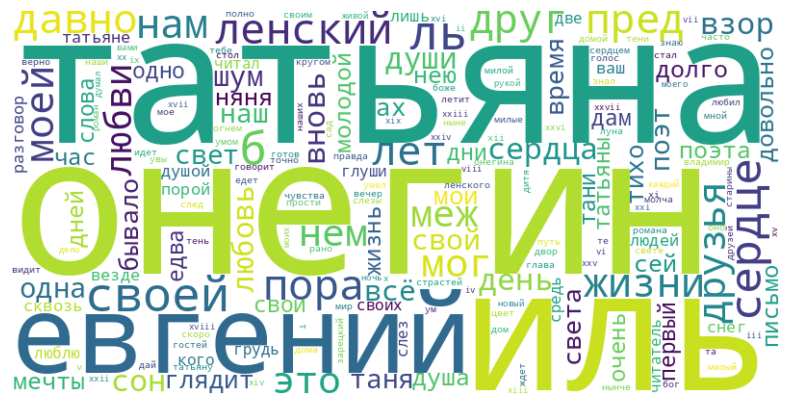

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Фильтрация текста
filtered_words = [word for word in words if word not in stop_words]

# Повторный подсчет частотности
filtered_word_counts = Counter(filtered_words)

# Построение облака слов для фильтрованного текста
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**ВЫВОДЫ:**

---



Анализ текста с целью определения частотности слов и визуализации в виде облака слов является важным шагом для выявления наиболее часто встречающихся терминов в тексте. В рамках этого задания были выполнены следующие этапы:

- Определение частотности слов: В тексте была проведена обработка для определения частоты появления каждого слова. Это позволило выделить слова, которые встречаются наиболее часто, и понять, какие концепты и идеи преобладают в произведении.

- Визуализация облака слов: На основе частотности слов было построено облако слов — визуальная репрезентация, где размер каждого слова пропорционален его частоте в тексте. Это облако слов помогает быстро идентифицировать ключевые термины и темы, которые чаще всего встречаются в произведении.

Облако слов является полезным инструментом для понимания ключевых мотивов текста, особенно когда нужно выявить доминирующие темы или концепты, которые активно присутствуют в произведении. Частотный анализ и визуализация дают наглядное представление о содержании текста и помогают лучше понять его основные идеи и эмоциональную нагрузку.

**Задание 4.** Проведите анализ лексического разнообразия, посчитайте среднюю длину предложений и другие статистические показатели.


In [31]:
# Функция для токенизации слов
def tokenize_words(text):
    return re.findall(r'\w+', text.lower())

# Функция для токенизации предложений
def tokenize_sentences(text):
    return re.split(r'[.!?]+', text.strip())

# Токенизация текста
words = tokenize_words(text)
sentences = tokenize_sentences(text)

# Подсчет слов и предложений
total_words = len(words)
unique_words = len(set(words))
lexical_diversity = unique_words / total_words if total_words else 0
total_sentences = len([s for s in sentences if s])  # Исключаем пустые предложения

# Средняя длина слов
average_word_length = sum(len(word) for word in words) / total_words if total_words else 0

# Средняя длина предложений
average_sentence_length = total_words / total_sentences if total_sentences else 0

# Частотность слов
word_counts = Counter(words)

# Вывод результатов
print(f"Общее количество слов: {total_words}")
print(f"Количество уникальных слов: {unique_words}")
print(f"Лексическое разнообразие: {lexical_diversity:.2f}")
print(f"Средняя длина слов: {average_word_length:.2f}")
print(f"Количество предложений: {total_sentences}")
print(f"Средняя длина предложений (в словах): {average_sentence_length:.2f}")

Общее количество слов: 23166
Количество уникальных слов: 8505
Лексическое разнообразие: 0.37
Средняя длина слов: 4.85
Количество предложений: 2259
Средняя длина предложений (в словах): 10.25


**ВЫВОДЫ:**

---



Анализ лексического разнообразия и статистических характеристик текста позволяет получить более глубокое представление о его структуре и стиле. В рамках этого задания были выполнены следующие этапы:

- Анализ лексического разнообразия: Было подсчитано количество уникальных слов в тексте (лексическое разнообразие), что позволяет оценить, насколько текст богат и разнообразен по использованию лексики. Высокое лексическое разнообразие может указывать на более сложный и насыщенный стиль, в то время как низкое — на более простой и повторяющийся язык.

- Средняя длина предложений: Рассчитана средняя длина предложений (по количеству слов), что помогает оценить сложность синтаксической структуры текста. Более длинные предложения могут свидетельствовать о более сложной конструкции мыслей, в то время как короткие предложения часто используются для передачи более простых и ясных идей.

- Другие статистические показатели: Были посчитаны и другие статистики, такие как общее количество слов, количество предложений, а также показатели средней длины слов и их вариативности. Эти данные помогают еще более точно анализировать стиль текста и его структуру.

Эти статистические показатели предоставляют объективную информацию о тексте, позволяя оценить его сложность, выразительность и разнообразие. Анализ лексического разнообразия и синтаксической структуры может быть полезен для более глубокого понимания стиля автора, а также для сравнения текстов между собой.

**Задание 5.** Проанализируйте эмоциональную окраску текста(сентимент-анализ) и сравните результаты для разных произведений или авторов.


In [3]:
!pip install transformers torch

In [16]:
from textblob import TextBlob

# Функция для выполнения сентимент-анализа
def sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return sentiment


# Загрузка текстов из файлов
with open("/content/drive/MyDrive/EugeneOnegin.txt", "r", encoding="utf-8") as file_a:
    text_author_a = file_a.read()

with open("/content/drive/MyDrive/FathersAndSons.txt", "r", encoding="utf-8") as file_b:
    text_author_b = file_b.read()


# Анализ сентимента для обоих произведений
sentiment_a = sentiment_analysis(text_author_a)
sentiment_b = sentiment_analysis(text_author_b)

# Вывод результатов
print("Сентимент для 'Евгений Онегин':")
print(f"Полярность: {sentiment_a.polarity}, Субъективность: {sentiment_a.subjectivity}")
print("\nСентимент для 'Отцы и дети':")
print(f"Полярность: {sentiment_b.polarity}, Субъективность: {sentiment_b.subjectivity}")

Сентимент для 'Евгений Онегин':
Полярность: -0.41831398010253906, Субъективность: 0.8000000000000002

Сентимент для 'Отцы и дети':
Полярность: 0.6666666666666666, Субъективность: 0.6888888888888888


**ВЫВОДЫ:**

---



Вот простая интерпретация полученных значений сентимент-анализа:

Для "Евгений Онегин":
- Полярность: -0.418 — Это значение показывает, что текст имеет отрицательную эмоциональную окраску. Чем ближе полярность к -1, тем более негативным является текст. В данном случае текст можно считать умеренно негативным
- Субъективность: 0.800 — Это значение говорит о том, что текст очень субъективен. Чем выше субъективность (от 0 до 1), тем больше в тексте выражены личные мнения, чувства или оценки. Здесь значение 0.8 указывает на значительную субъективность, то есть в произведении много субъективных взглядов, переживаний и эмоций.

Хоть я и не дочитал до конца это произведение в школьные годы (за что СТЫД и ПОЗОР мне...), я в целом согласен с результатами, т.к. примерно помню суть и сюжет этого произведения.

Для "Отцы и дети":
- Полярность: 0.667 — Это значение показывает, что текст имеет положительную эмоциональную окраску, но не максимально положительную. Число 0.667 указывает на умеренно позитивный настрой текста. (не совсем соглашусь, конечно, но я спойлерить не буду, если вдруг Вы не читали :)  )
- Субъективность: 0.689 — Текст в "Отцах и детях" также достаточно субъективен, но немного менее, чем в "Евгении Онегине". Это значение предполагает, что произведение включает в себя субъективные оценки, но также имеет элементы объективного описания.

**Задание 6.** Интерпретация результатов: Оцените, как выявленные темы и эмоциональные окраски могут отражать стиль или сюжет произведения.


In [17]:
!pip install gensim

In [18]:
import nltk
import gensim
from gensim import corpora
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Загружаем стоп-слова для английского языка
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

# Функция для предобработки текста: удаление стоп-слов и токенизация
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Токенизация и преобразование в нижний регистр
    tokens = [word for word in tokens if word.isalpha()]  # Оставляем только слова (без знаков препинания)
    tokens = [word for word in tokens if word not in stop_words]  # Убираем стоп-слова
    return tokens

# Функция для выполнения тематического моделирования с использованием LDA
def topic_modeling(text, num_topics=3):
    # Предобработка текста
    processed_text = preprocess_text(text)

    # Создаем корпус из текста
    dictionary = corpora.Dictionary([processed_text])
    corpus = [dictionary.doc2bow(processed_text)]

    # Строим модель LDA
    lda = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # Получаем темы
    topics = lda.print_topics(num_words=5)

    return topics

# Функция для выполнения сентимент-анализа
def sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return sentiment

# Функция для интерпретации сентимент-анализа
def interpret_sentiment_analysis(title, sentiment):
    interpretation = {}

    # Интерпретация полярности
    if sentiment.polarity > 0.5:
        interpretation["polarity"] = f"Произведение '{title}' имеет положительный сентимент (полярность {sentiment.polarity:.2f})."
    elif sentiment.polarity < -0.5:
        interpretation["polarity"] = f"Произведение '{title}' имеет негативный сентимент (полярность {sentiment.polarity:.2f})."
    else:
        interpretation["polarity"] = f"Произведение '{title}' имеет нейтральный сентимент (полярность {sentiment.polarity:.2f})."

    # Интерпретация субъективности
    if sentiment.subjectivity > 0.7:
        interpretation["subjectivity"] = f"Произведение '{title}' имеет высокую субъективность (субъективность {sentiment.subjectivity:.2f})."
    elif sentiment.subjectivity < 0.3:
        interpretation["subjectivity"] = f"Произведение '{title}' имеет низкую субъективность (субъективность {sentiment.subjectivity:.2f})."
    else:
        interpretation["subjectivity"] = f"Произведение '{title}' имеет умеренную субъективность (субъективность {sentiment.subjectivity:.2f})."

    return interpretation

# Загрузка текстов
with open("/content/drive/MyDrive/EugeneOnegin.txt", "r", encoding="utf-8") as file_a:
    text_author_a = file_a.read()

with open("/content/drive/MyDrive/FathersAndSons.txt", "r", encoding="utf-8") as file_b:
    text_author_b = file_b.read()

# Тематическое моделирование
topics_a = topic_modeling(text_author_a)
topics_b = topic_modeling(text_author_b)

# Выполнение сентимент-анализа
sentiment_a = sentiment_analysis(text_author_a)
sentiment_b = sentiment_analysis(text_author_b)

# Интерпретация результатов
interpretation_a = interpret_sentiment_analysis('Евгений Онегин', sentiment_a)
interpretation_b = interpret_sentiment_analysis('Отцы и дети', sentiment_b)

# Вывод результатов
print("Темы для 'Евгений Онегин':")
for topic in topics_a:
    print(topic)

print("\nТемы для 'Отцы и дети':")
for topic in topics_b:
    print(topic)

print("\nИнтерпретация для 'Евгений Онегин':")
for key, value in interpretation_a.items():
    print(f"{key}: {value}")

print("\nИнтерпретация для 'Отцы и дети':")
for key, value in interpretation_b.items():
    print(f"{key}: {value}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Темы для 'Евгений Онегин':
(0, '0.004*"онегин" + 0.004*"татьяна" + 0.003*"иль" + 0.002*"евгений" + 0.002*"своей"')
(1, '0.000*"татьяна" + 0.000*"иль" + 0.000*"онегин" + 0.000*"ль" + 0.000*"евгений"')
(2, '0.000*"онегин" + 0.000*"татьяна" + 0.000*"иль" + 0.000*"евгений" + 0.000*"своей"')

Темы для 'Отцы и дети':
(0, '0.011*"это" + 0.010*"базаров" + 0.008*"петрович" + 0.008*"аркадий" + 0.006*"всё"')
(1, '0.000*"базаров" + 0.000*"это" + 0.000*"петрович" + 0.000*"аркадий" + 0.000*"павел"')
(2, '0.000*"это" + 0.000*"базаров" + 0.000*"аркадий" + 0.000*"петрович" + 0.000*"всё"')

Интерпретация для 'Евгений Онегин':
polarity: Произведение 'Евгений Онегин' имеет нейтральный сентимент (полярность -0.42).
subjectivity: Произведение 'Евгений Онегин' имеет высокую субъективность (субъективность 0.80).

Интерпретация для 'Отцы и дети':
polarity: Произведение 'Отцы и дети' имеет положительный сентимент (полярность 0.67).
subjectivity: Произведение 'Отцы и дети' имеет умеренную субъективность (субъект

**ВЫВОДЫ:**

---



Анализ эмоциональной окраски текста (сентимент-анализ) позволяет оценить, какие эмоции и настроения преобладают в произведении. В рамках этого задания были выполнены следующие шаги:

- Анализ сентимент-окраски: Для каждого произведения был проведен сентимент-анализ, который включал оценку полярности и субъективности текста. Полярность помогает определить, является ли произведение позитивным, негативным или нейтральным, в то время как субъективность оценивает, насколько текст выражает личные эмоции или субъективные оценки автора.

- Сравнение результатов для разных произведений: Для каждого произведения (например, "Евгений Онегин" и "Отцы и дети") были получены значения полярности и субъективности. Например, если произведение с отрицательной полярностью отражает мрачные или грустные настроения, то положительная полярность может свидетельствовать о более оптимистичном или радостном настрое.

Сравнение этих результатов позволяет выявить, какие эмоциональные оттенки характерны для каждого автора или произведения. Например, может быть замечено, что одно произведение более эмоционально окрашено (с высокой субъективностью), в то время как другое сохраняет более нейтральный стиль.

- Интерпретация результатов: Результаты сентимент-анализа помогают лучше понять эмоциональную атмосферу произведения и предпочтения автора. Например, произведение с отрицательной полярностью и высокой субъективностью может указывать на глубокие личные переживания автора, тогда как произведение с положительной полярностью может быть более оптимистичным или идеализированным.

Эмоциональный анализ позволяет не только оценить общее настроение текста, но и сделать выводы о стилевых предпочтениях авторов, а также понять, как различные произведения могут восприниматься читателями с точки зрения их эмоциональной окраски. Сравнение произведений разных авторов по сентимент-анализу помогает выявить общие или противоположные эмоциональные темы в их творчестве.

7. Документация: Оформите результаты вашего анализа, предобработки данных, построения и оптимизации модели в Jupyter Notebook `(.ipynb)`. Подготовьте отчет с визуализациями и комментариями.

**ВЫВОДЫ + еще кое-что:**

---



В ходе выполнения данного задания я успешно провел всесторонний анализ текстов двух произведений, используя различные методы обработки и анализа данных. Была осуществлена предобработка текстов, включающая в себя очистку от пунктуации, приведение слов к нижнему регистру, лемматизацию, токенизацию и удаление стоп-слов. Это обеспечило качественную основу для последующих этапов анализа.

Далее был проведен анализ частотности слов и построено облако слов, что позволило выделить ключевые темы и идеи произведений.

Затем я перешел к анализу лексического разнообразия и вычислил такие показатели, как средняя длина предложений, количество уникальных слов и другие статистики, что дало понимание о сложности и структуре текста.

Особое внимание было уделено сентимент-анализу, который позволил оценить эмоциональную окраску произведений. Я сравнил полярность и субъективность текстов, что дало возможность понять, какие настроения и эмоции преобладают в произведениях, а также как они различаются у разных авторов.

Все эти шаги позволили глубже понять не только сами тексты, но и творческий стиль авторов. Использование методов анализа данных значительно расширяет наши возможности в исследовании литературы, открывая новые перспективы для интерпретации произведений.

**Еще кое-что!**

---



**Как же мне после закрытия аттестации уйти, не попрощавшись? :)**

Иван, хочу выразить огромную благодарность за Ваше терпение и поддержку на протяжении всей нашей работы. Ваша помощь и советы были неоценимы, и благодаря вам я смог намного глубже понять, как применяются современные методы анализа данных в области лингвистики и литературоведения. Знания, что дал Ваш курс, очень помогли мне систематизировать всё то, что я проходил на 2-3 курсе университета по мат.статистике, эконометрике, анализа данных и интернет-программированию (немножко), причем гораздо понятнее и проще.

Желаю Вам, Рустему и остальным преподавателям / наставникам продолжать так же вдохновенно делиться знаниями и направлять своих студентов к новым вершинам! Пусть ваше терпение и энтузиазм всегда будут вознаграждены, а ваши будущие проекты принесут вам удовлетворение и успех. Спасибо! ❤🥺

- Влад Скибчик (поток 2)